Packages
=====================

In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from collections import OrderedDict
from torch.autograd.variable import Variable
import seaborn as sns

Import data
=====================

In [2]:
from tensorflow.keras.datasets import mnist
(X_train_numpy, Y_train_numpy), (X_test_numpy, Y_test_numpy) = mnist.load_data()
print(f"x_train's shape is {X_train_numpy.shape}\n x_test's shape is {X_test_numpy.shape}\n \
y_train's shape is {Y_train_numpy.shape}\n y_test's shape is {Y_test_numpy.shape}")

x_train's shape is (60000, 28, 28)
 x_test's shape is (10000, 28, 28)
 y_train's shape is (60000,)
 y_test's shape is (10000,)


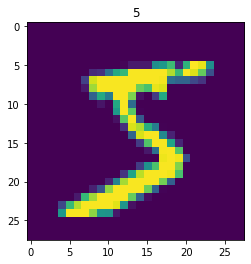

In [3]:
def show_image(i):
    image = X_train_numpy[i]
    plt.imshow(image)
    plt.title(Y_train_numpy[i])
    plt.show()
show_image(0)

In [11]:
X_train = torch.div(torch.from_numpy(X_train_numpy).type(torch.FloatTensor), 127.5)[0:10000].cuda() - 1
# X_test = torch.div(torch.from_numpy(X_test_numpy).type(torch.FloatTensor), 127.5).cuda() - 1
# Y_train = torch.from_numpy(Y_train_numpy).type(torch.long)[0:10000]
# Y_test = torch.from_numpy(Y_test_numpy).type(torch.long).cuda()

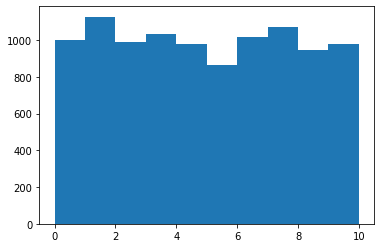

In [4]:
plt.hist(Y_train_numpy[0:10000], bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.show()

Discriminator
====================

In [3]:
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(OrderedDict([
            # hidden layer 1
            ('fc1', nn.Linear(28 * 28, 1024)),
            ('rl1', nn.LeakyReLU(0.2)),
            ('dt1', nn.Dropout(0.2)),

            # hidden layer 2
            ('fc2', nn.Linear(1024, 512)),
            ('rl2', nn.LeakyReLU(0.2)),
            ('dt2', nn.Dropout(0.2)),

            # hidden layer 3
            ('fc3', nn.Linear(512, 256)),
            ('rl3', nn.LeakyReLU(0.2)),
            ('dt3', nn.Dropout(0.2)),

            # out layer
            ('fc4', nn.Linear(256, 1)),
            ('sg1', nn.Sigmoid())
        ]))
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = self.model(x)
        return x

Generator
================
use noisy vectors to ignite whose shape is (N, 100)    
(N, 100) in image out  
N is batch_size, the number of all pictures

In [4]:
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.model = nn.Sequential(OrderedDict([
            # hidden layer 1
            ('fc1', nn.Linear(100, 256)),
            ('rl1', nn.LeakyReLU(0.2)),

            # hidden layer 2
            ('fc2', nn.Linear(256, 512)),
            ('rl2', nn.LeakyReLU(0.2)),

            # hidden layer 3
            ('fc3', nn.Linear(512, 1024)),
            ('rl3', nn.LeakyReLU(0.2)),

            # out layer
            ('fc4', nn.Linear(1024, 28 * 28)),
            ('th1', nn.Tanh())
        ]))

    def vec2img(self, x):
        return x.view(x.size()[0], 1, 28, 28)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = self.model(x)
        x = self.vec2img(x)
        return x

Implement
=========================

instance
---------------

In [5]:
discriminator = Discriminator().cuda()
generator = Generator().cuda()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr = 0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr = 0.0002)

loss function
---------------------

In [6]:
loss_function = nn.BCELoss()

noise
---------------------

In [7]:
def noise(size):
    return Variable(torch.randn(size, 100)).cuda()

parameters
----------------

In [8]:
epochs = 40000

execute
-----------------

In [9]:
def show_generate_image(x_torch):
    x = x_torch[0:8, 0:1, 0:28, 0:28].cpu().detach().numpy().reshape((8, 28, 28))
    fig, ax = plt.subplots(1, 8, figsize=(17,17))
    for i, img in enumerate(x):
        ax[i].imshow(img)
    plt.show()

epoch is 999: discriminator loss is         0.053410678170621395, generator loss is 7.407475471496582


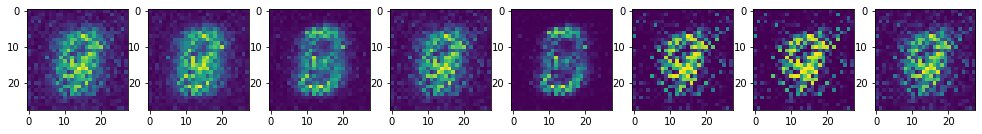

epoch is 1999: discriminator loss is         0.1419307328760624, generator loss is 5.886565685272217


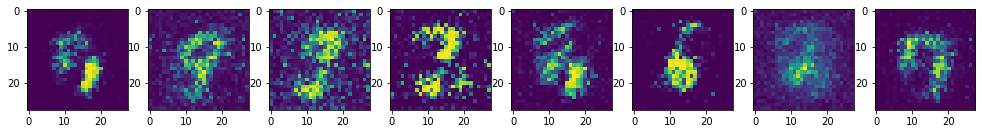

epoch is 2999: discriminator loss is         0.09698470309376717, generator loss is 7.201915264129639


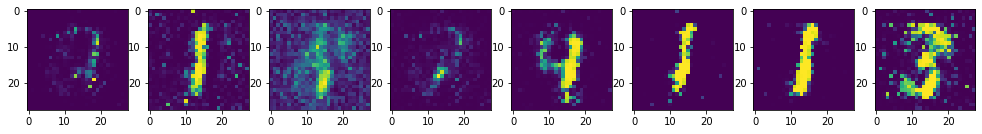

epoch is 3999: discriminator loss is         0.2301412746310234, generator loss is 4.708129405975342


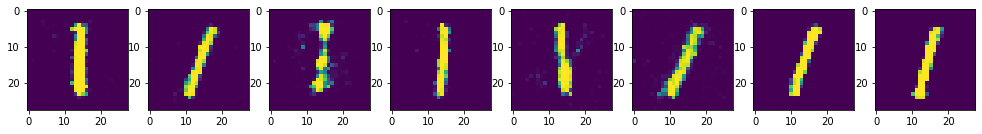

epoch is 4999: discriminator loss is         0.328364759683609, generator loss is 3.6004881858825684


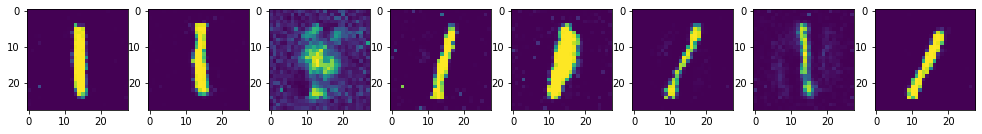

epoch is 5999: discriminator loss is         0.29432213306427, generator loss is 3.611119508743286


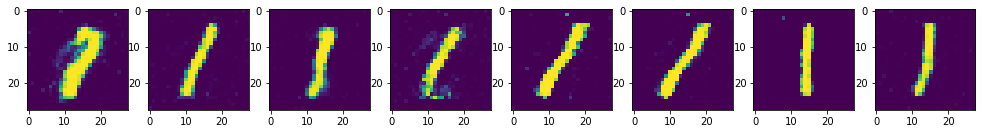

epoch is 6999: discriminator loss is         0.37154944241046906, generator loss is 3.208610773086548


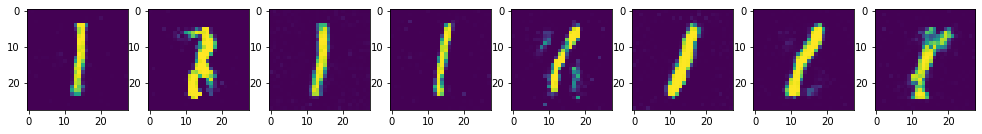

epoch is 7999: discriminator loss is         0.4303307384252548, generator loss is 2.793618679046631


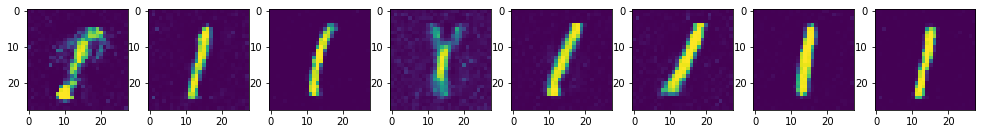

epoch is 8999: discriminator loss is         0.4059142470359802, generator loss is 2.8549818992614746


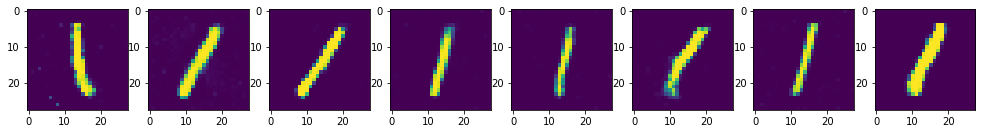

epoch is 9999: discriminator loss is         0.379861056804657, generator loss is 3.14231276512146


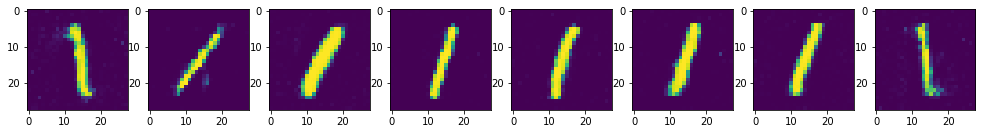

epoch is 10999: discriminator loss is         0.4281676709651947, generator loss is 2.829403877258301


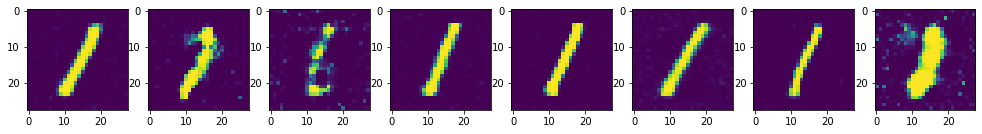

epoch is 11999: discriminator loss is         0.3891155570745468, generator loss is 3.007077932357788


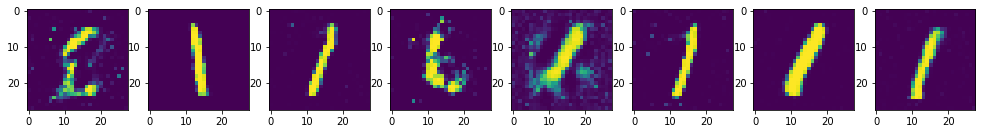

epoch is 12999: discriminator loss is         0.43771542608737946, generator loss is 2.635469913482666


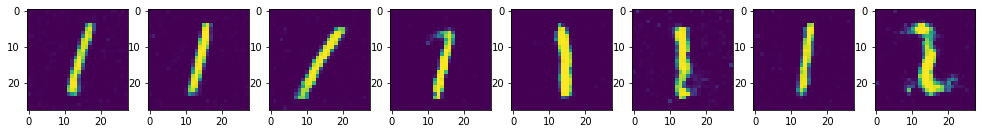

epoch is 13999: discriminator loss is         0.5199804455041885, generator loss is 2.4914586544036865


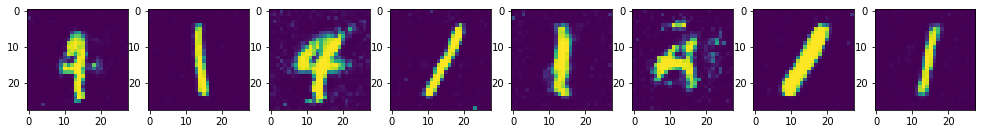

epoch is 14999: discriminator loss is         0.5041486471891403, generator loss is 2.5843324661254883


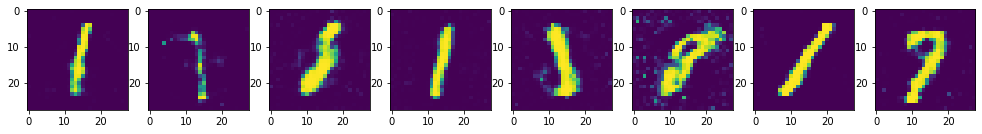

epoch is 15999: discriminator loss is         0.5745219737291336, generator loss is 2.4170734882354736


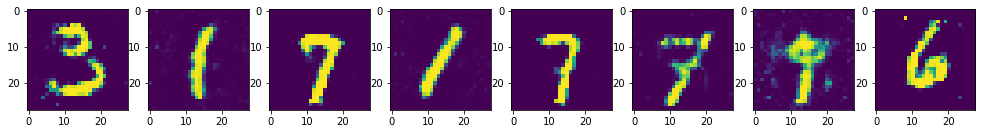

epoch is 16999: discriminator loss is         0.6081646084785461, generator loss is 2.220280408859253


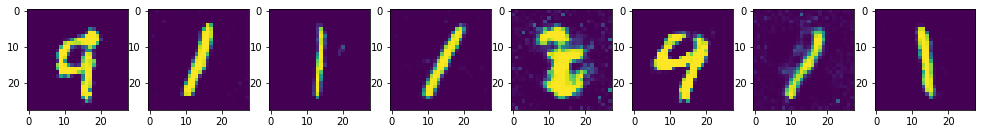

epoch is 17999: discriminator loss is         0.7367633283138275, generator loss is 2.0841224193573


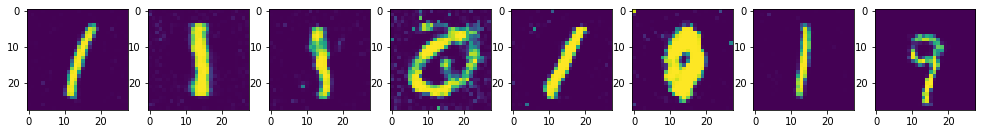

epoch is 18999: discriminator loss is         0.6999928057193756, generator loss is 2.1763410568237305


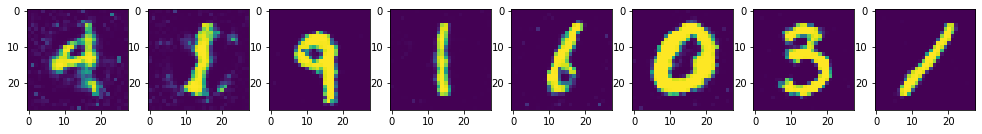

epoch is 19999: discriminator loss is         0.7095161080360413, generator loss is 2.09266996383667


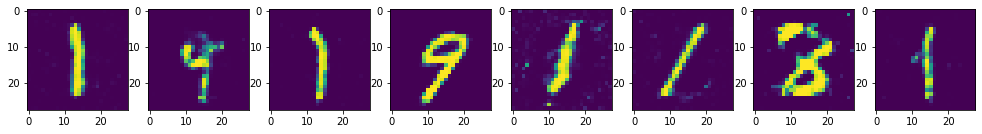

epoch is 20999: discriminator loss is         0.7892521023750305, generator loss is 1.9563087224960327


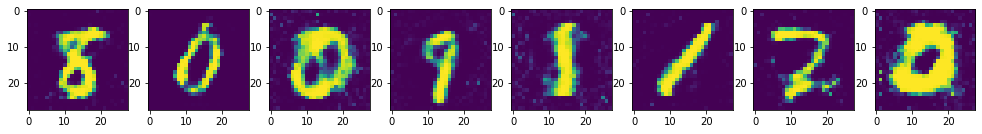

epoch is 21999: discriminator loss is         0.7610805630683899, generator loss is 2.1423146724700928


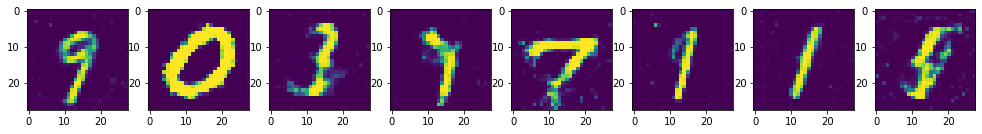

epoch is 22999: discriminator loss is         0.7990656495094299, generator loss is 1.985703468322754


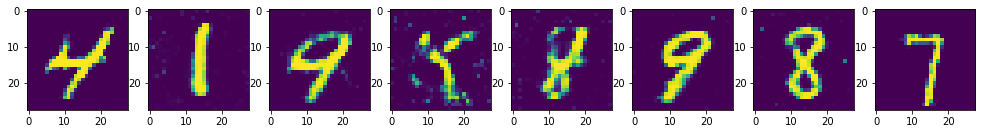

epoch is 23999: discriminator loss is         0.7825806438922882, generator loss is 2.09489369392395


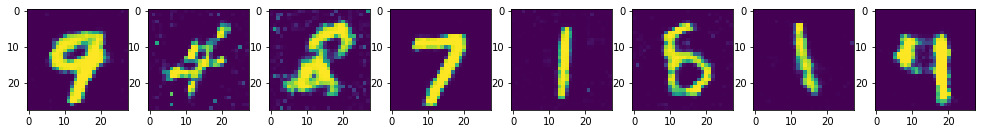

epoch is 24999: discriminator loss is         0.789782702922821, generator loss is 2.0415656566619873


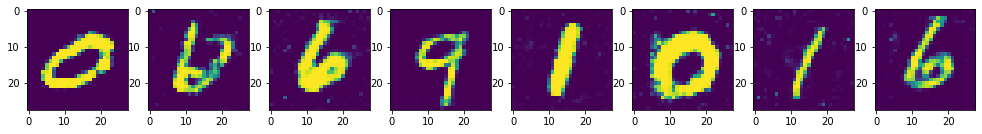

epoch is 25999: discriminator loss is         0.7684320509433746, generator loss is 2.160250425338745


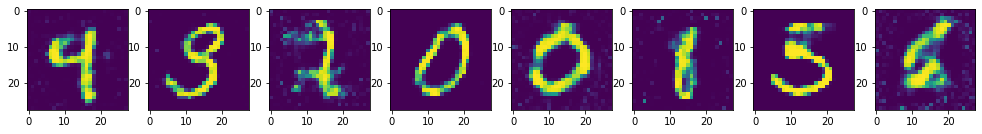

epoch is 26999: discriminator loss is         0.7701160907745361, generator loss is 2.1569480895996094


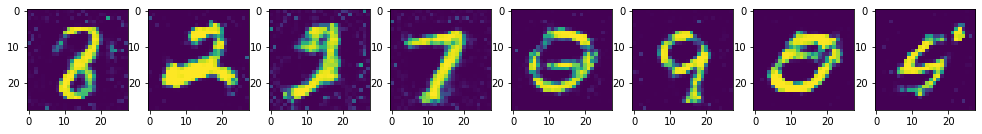

epoch is 27999: discriminator loss is         0.7426831722259521, generator loss is 2.1691956520080566


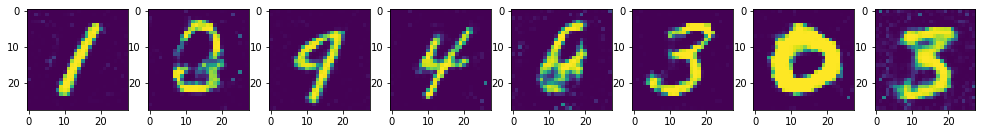

epoch is 28999: discriminator loss is         0.7567305266857147, generator loss is 2.3364648818969727


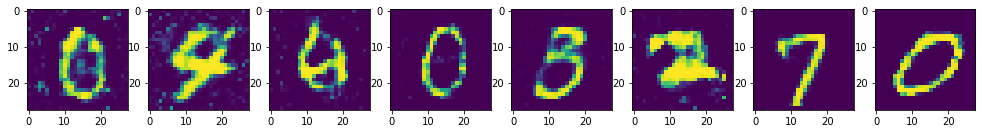

epoch is 29999: discriminator loss is         0.7256660163402557, generator loss is 2.3189408779144287


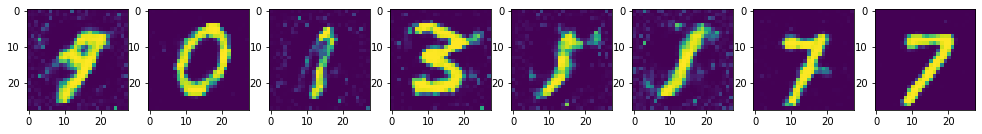

epoch is 30999: discriminator loss is         0.7039399147033691, generator loss is 2.3651838302612305


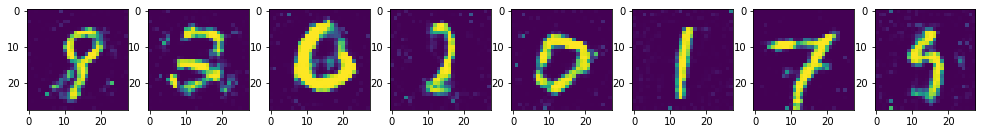

epoch is 31999: discriminator loss is         0.6960164904594421, generator loss is 2.4009242057800293


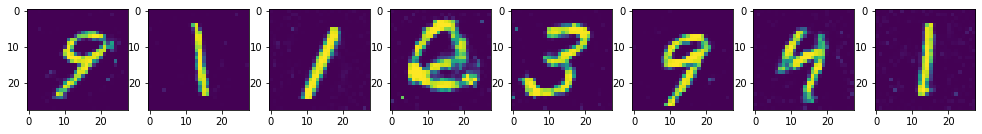

epoch is 32999: discriminator loss is         0.6719717383384705, generator loss is 2.4609715938568115


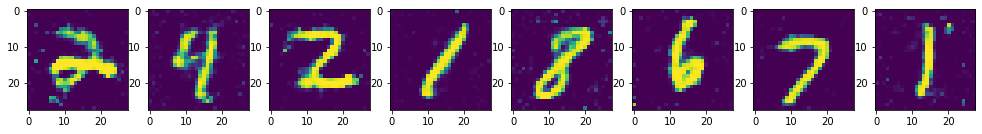

epoch is 33999: discriminator loss is         0.6577638983726501, generator loss is 2.533129930496216


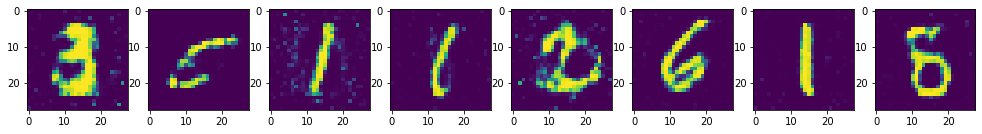

epoch is 34999: discriminator loss is         0.6794335246086121, generator loss is 2.5809242725372314


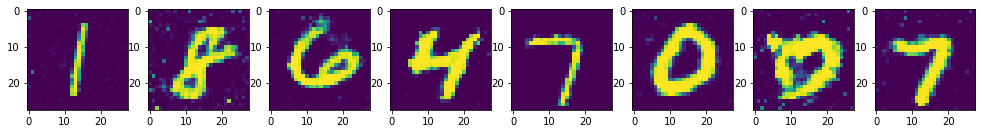

epoch is 35999: discriminator loss is         0.6194952130317688, generator loss is 2.6764681339263916


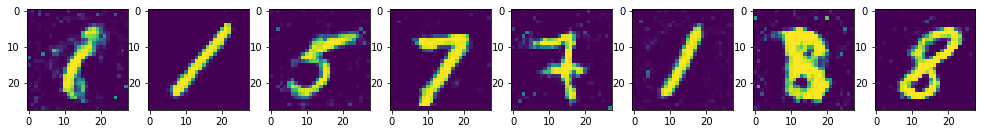

epoch is 36999: discriminator loss is         0.6083620488643646, generator loss is 2.773338556289673


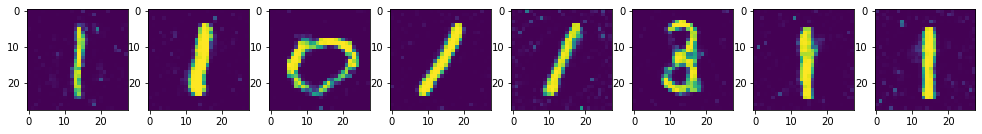

epoch is 37999: discriminator loss is         0.5862018465995789, generator loss is 2.8130006790161133


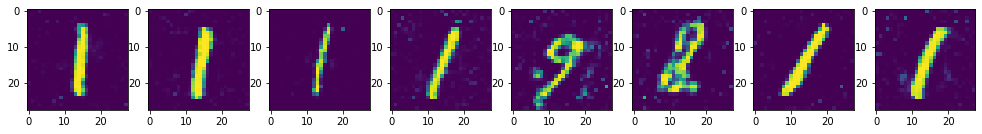

epoch is 38999: discriminator loss is         0.5747417509555817, generator loss is 2.9385910034179688


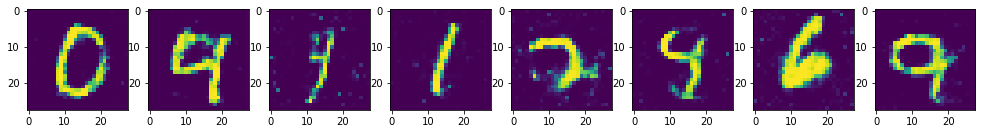

epoch is 39999: discriminator loss is         0.618754118680954, generator loss is 3.038459300994873


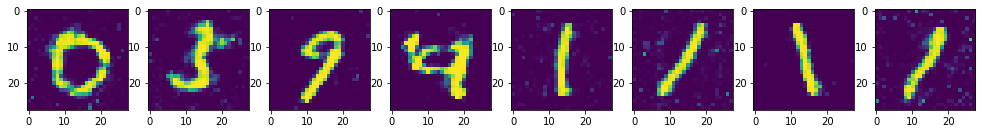

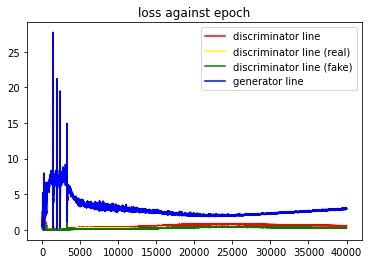

In [12]:
from tqdm.notebook import tnrange, tqdm_notebook

epoch_list = []
dis_list = []
gen_list = []
dis_real_list = []
dis_fake_list = []

for epoch in tnrange(epochs):
    N = X_train.size()[0] # number of all train image

    # feed generator with noise
    fake = generator(noise(N)).detach() # fake is a image
    
    # train discriminator
    # train real data
    discriminator_optimizer.zero_grad()
    pred_real = discriminator(X_train) 
    loss_real = loss_function(pred_real, torch.ones(N, 1).cuda())
    loss_real.backward()
    discriminator_optimizer.step()
    discriminator_optimizer.zero_grad()
    # train fake data
    discriminator_optimizer.zero_grad()
    pred_fake = discriminator(fake)
    loss_fake = loss_function(pred_fake, torch.zeros(N, 1).cuda())
    loss_fake.backward()
    discriminator_optimizer.step()
    discriminator_optimizer.zero_grad()

    # train generator
    fake = generator(noise(N))
    generator_optimizer.zero_grad()
    pred = discriminator(fake)
    loss = loss_function(pred, torch.ones(N, 1).cuda())
    loss.backward()
    generator_optimizer.step()
    generator_optimizer.zero_grad()

    epoch_list.append(epoch)
    dis_list.append(loss_fake.item() + loss_real.item())
    dis_real_list.append(loss_real.item())
    dis_fake_list.append(loss_fake.item())
    gen_list.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f"epoch is {epoch}: discriminator loss is \
        {loss_fake.item() + loss_real.item()}, generator loss is {loss.item()}")
        show_generate_image(generator(noise(8)))
    

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=dis_list, color='red', label='discriminator line', ax=ax)
sns.lineplot(x=epoch_list, y=dis_real_list, color='yellow', label='discriminator line (real)', ax=ax)
sns.lineplot(x=epoch_list, y=dis_fake_list, color='green', label='discriminator line (fake)', ax=ax)
sns.lineplot(x=epoch_list, y=gen_list, color='blue', label='generator line', ax=ax)
plt.title(f"loss against epoch")
plt.show()


generate images
----------------------

In [ ]:
def show_generate_image(x_torch):
    x = x_torch[0:8, 0:1, 0:28, 0:28].cpu().detach().numpy().reshape((8, 28, 28))
    fig, ax = plt.subplots(1, 8, figsize=(17,17))
    for i, img in enumerate(x):
        ax[i].imshow(img)
    plt.show()